<a href="https://colab.research.google.com/github/sanlamia/lab01ML/blob/main/Colaboratory_%E0%A6%A4%E0%A7%87_%E0%A6%B8%E0%A7%8D%E0%A6%AC%E0%A6%BE%E0%A6%97%E0%A6%A4%E0%A6%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ucimlrepo

In [31]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [9]:
# Load the dataset
url = '/content/agaricus-lepiota.data'
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print(data.head())
print(data.info())
#print(data.describe(include='all'))


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

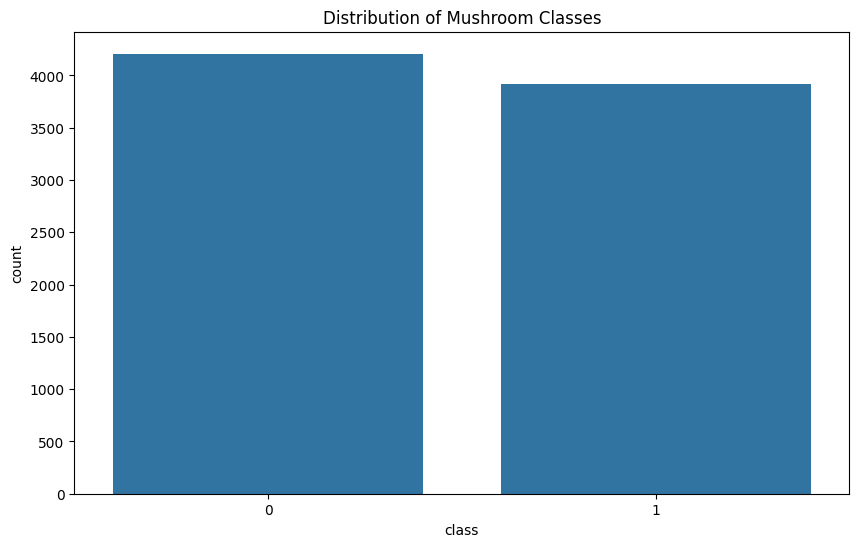

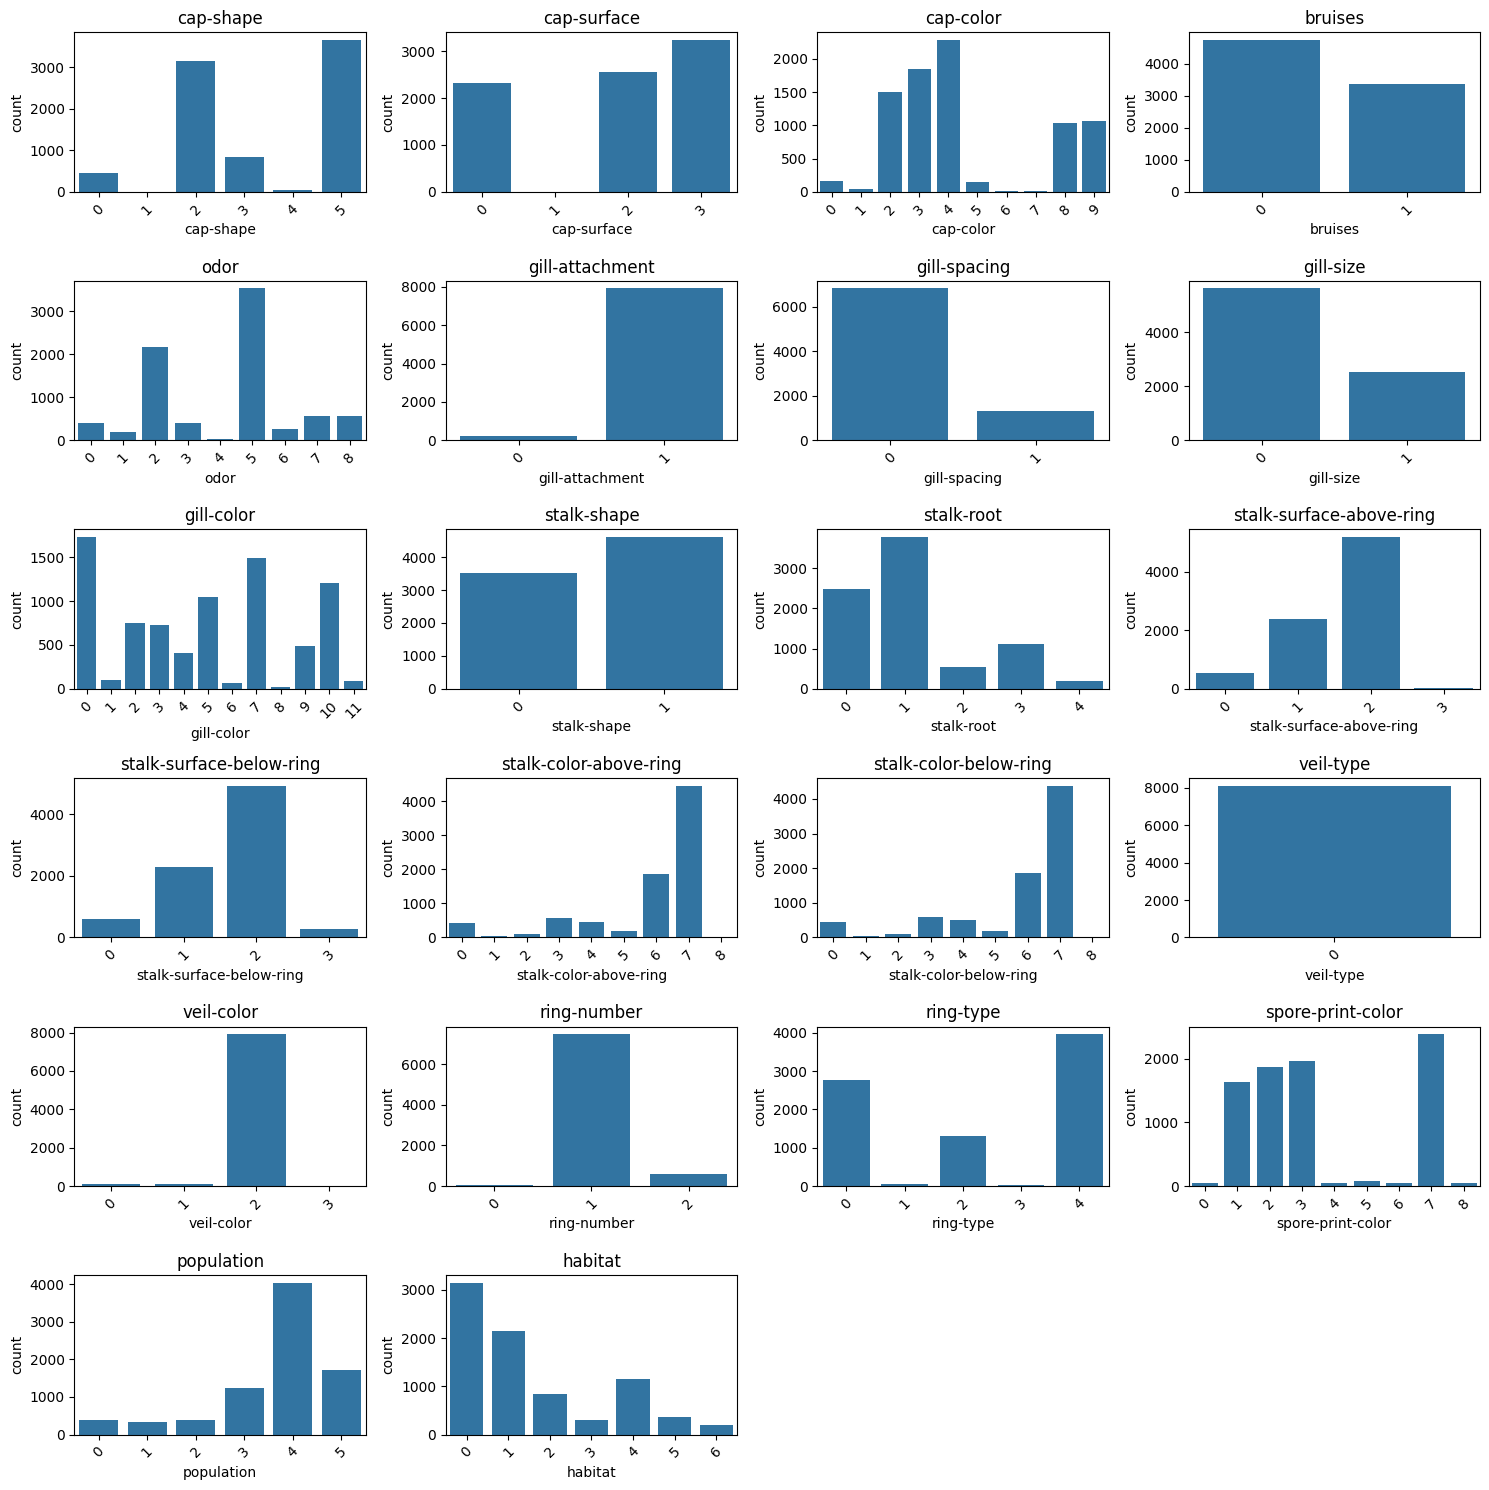

In [34]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='class')
plt.title('Distribution of Mushroom Classes')
plt.show()

# Visualize feature distributions with count plots
plt.figure(figsize=(15, 15))
for i, column in enumerate(data.columns[1:], start=1):
    plt.subplot(6, 4, i)
    sns.countplot(data=data, x=column)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x700 with 0 Axes>

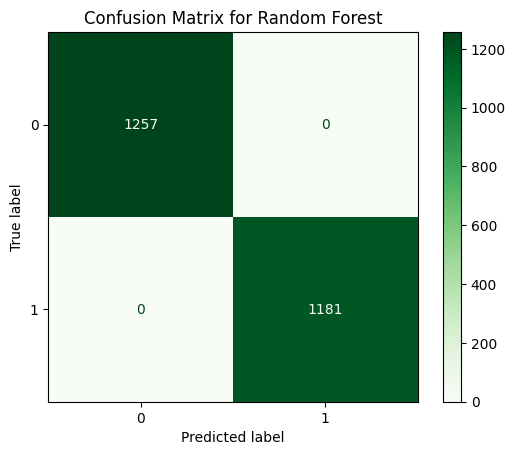

In [36]:
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
plt.figure(figsize=(10, 7))
disp_rf.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


<Figure size 1000x700 with 0 Axes>

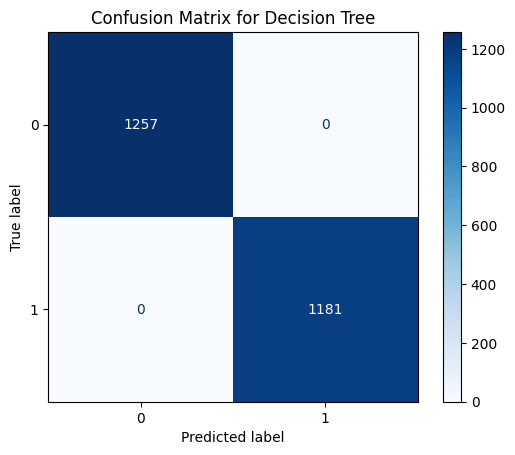

In [37]:
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
plt.figure(figsize=(10, 7))
disp_dt.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Accuracy with 1 estimators: 1.0000
Accuracy with 50 estimators: 1.0000
Accuracy with 100 estimators: 1.0000
Accuracy with 150 estimators: 1.0000
Accuracy with 200 estimators: 1.0000
Accuracy with 250 estimators: 1.0000


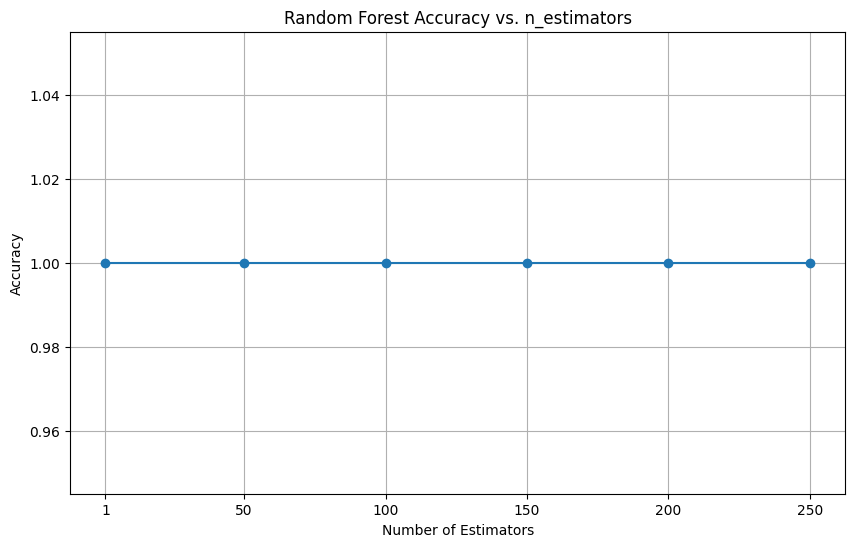

In [28]:
# Split the data into training and testing sets
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate Random Forest models with different n_estimators
n_estimators_list = [1, 50, 100, 150, 200, 250]
accuracies = {}

for n in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[n] = accuracy
    print(f"Accuracy with {n} estimators: {accuracy:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, list(accuracies.values()), marker='o')
plt.title('Random Forest Accuracy vs. n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()


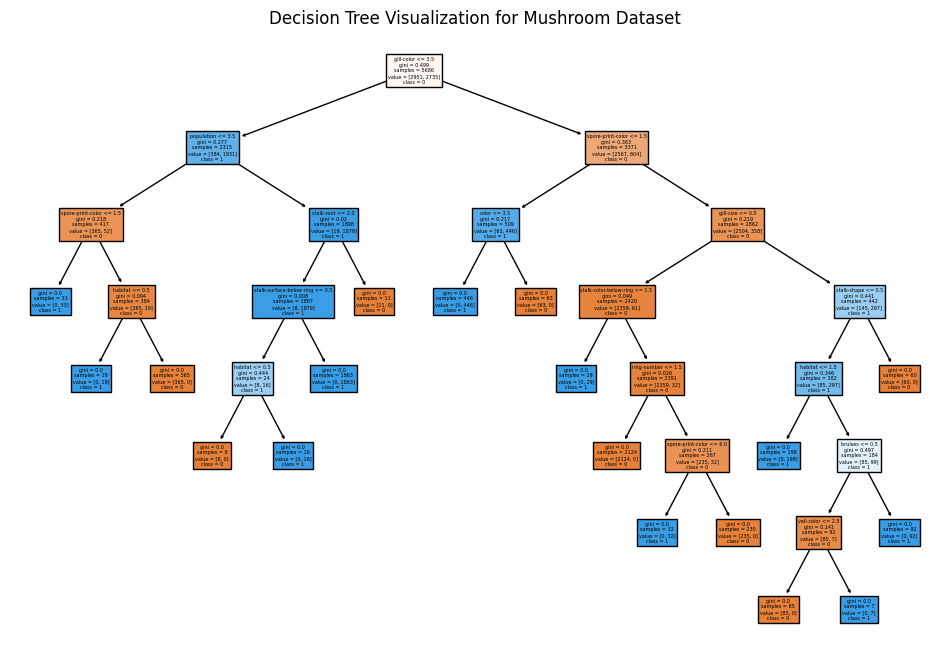

In [25]:
# Convert class names from numeric to string
class_names = label_encoders['class'].classes_.astype(str)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model,
               feature_names=X.columns,
               class_names=class_names,  # Use string class names
               filled=True)
plt.title('Decision Tree Visualization for Mushroom Dataset')
plt.show()


In [35]:
# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy of Decision Tree: {accuracy_dt:.4f}")

# Train and evaluate Random Forest with 100 estimators
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy of Random Forest with 100 estimators: {accuracy_rf:.4f}")

# Compare the performance
print(f"Decision Tree vs. Random Forest (n_estimators=100) Accuracy:")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Accuracy of Decision Tree: 1.0000
Accuracy of Random Forest with 100 estimators: 1.0000
Decision Tree vs. Random Forest (n_estimators=100) Accuracy:
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
